In [ ]:
from google.colab import drive
drive.mount('/content/drive')
print('Data source import complete.')

Mounted at /content/drive
Data source import complete.


In [ ]:
!pip install tensorflow

# Import needed modules

In [ ]:
# import system libs
import os
import time
import shutil
import pathlib
import itertools
from PIL import Image

# import data handling tools
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# import Deep learning Libraries
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

print ('modules loaded')

modules loaded


# **Data Preprocessing**

### **Read data and store it in dataframe**

In [ ]:
# Generate data paths with labels
data_dir = '/content/drive/MyDrive/ADY201m/lung_colon_image_set'
filepaths = []
labels = []

folds = os.listdir(data_dir)
for fold in folds:
    print("now",fold)
    foldpath = os.path.join(data_dir, fold)
    print("foldpath", foldpath)
    flist = os.listdir(foldpath)
    print("flist", flist)

    for f in flist:
        f_path = os.path.join(foldpath, f)
        print("f_path", f_path)
        filelist = os.listdir(f_path)
        print("filelist", filelist)

        for file in filelist:
            fpath = os.path.join(f_path, file)
            filepaths.append(fpath)

            if f == 'colon_aca':
                labels.append('Colon Adenocarcinoma')

            elif f == 'colon_n':
                labels.append('Colon Benign Tissue')

            elif f == 'lung_aca':
                labels.append('Lung Adenocarcinoma')

            elif f == 'lung_n':
                labels.append('Lung Benign Tissue')

            elif f == 'lung_scc':
                labels.append('Lung Squamous Cell Carcinoma')

# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
df = pd.concat([Fseries, Lseries], axis= 1)

now colon_image_sets
foldpath /content/drive/MyDrive/ADY201m/lung_colon_image_set/colon_image_sets
flist ['colon_n', 'colon_aca']
f_path /content/drive/MyDrive/ADY201m/lung_colon_image_set/colon_image_sets/colon_n
filelist ['colonn4738.jpeg', 'colonn4727.jpeg', 'colonn4715.jpeg', 'colonn4753.jpeg', 'colonn462.jpeg', 'colonn4647.jpeg', 'colonn4669.jpeg', 'colonn4651.jpeg', 'colonn4564.jpeg', 'colonn4696.jpeg', 'colonn459.jpeg', 'colonn4587.jpeg', 'colonn4709.jpeg', 'colonn4725.jpeg', 'colonn4652.jpeg', 'colonn4658.jpeg', 'colonn4714.jpeg', 'colonn4746.jpeg', 'colonn4737.jpeg', 'colonn4680.jpeg', 'colonn472.jpeg', 'colonn4741.jpeg', 'colonn4654.jpeg', 'colonn469.jpeg', 'colonn4693.jpeg', 'colonn4664.jpeg', 'colonn4661.jpeg', 'colonn4754.jpeg', 'colonn4655.jpeg', 'colonn4571.jpeg', 'colonn4717.jpeg', 'colonn4716.jpeg', 'colonn460.jpeg', 'colonn4626.jpeg', 'colonn4689.jpeg', 'colonn4649.jpeg', 'colonn4566.jpeg', 'colonn4707.jpeg', 'colonn4708.jpeg', 'colonn464.jpeg', 'colonn4699.jpeg', 'co

labels
Colon Benign Tissue             5004
Colon Adenocarcinoma            5000
Lung Adenocarcinoma             5000
Lung Squamous Cell Carcinoma    5000
Lung Benign Tissue              5000
Name: count, dtype: int64


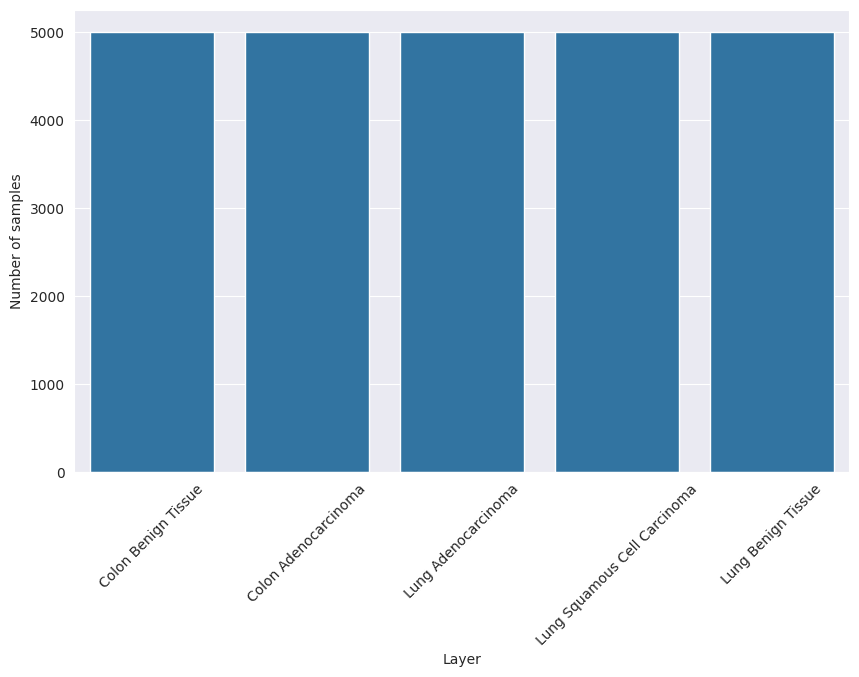

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Thống kê số lượng mẫu mỗi lớp
class_counts = df['labels'].value_counts()
print(class_counts)

# Trực quan hóa
plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title("")
plt.xlabel("Layer")
plt.ylabel("Number of samples")
plt.xticks(rotation=45)
plt.show()

In [ ]:
print(filepaths)
print(labels)

['/content/drive/MyDrive/ADY201m/lung_colon_image_set/colon_image_sets/colon_n/colonn4738.jpeg', '/content/drive/MyDrive/ADY201m/lung_colon_image_set/colon_image_sets/colon_n/colonn4727.jpeg', '/content/drive/MyDrive/ADY201m/lung_colon_image_set/colon_image_sets/colon_n/colonn4715.jpeg', '/content/drive/MyDrive/ADY201m/lung_colon_image_set/colon_image_sets/colon_n/colonn4753.jpeg', '/content/drive/MyDrive/ADY201m/lung_colon_image_set/colon_image_sets/colon_n/colonn462.jpeg', '/content/drive/MyDrive/ADY201m/lung_colon_image_set/colon_image_sets/colon_n/colonn4647.jpeg', '/content/drive/MyDrive/ADY201m/lung_colon_image_set/colon_image_sets/colon_n/colonn4669.jpeg', '/content/drive/MyDrive/ADY201m/lung_colon_image_set/colon_image_sets/colon_n/colonn4651.jpeg', '/content/drive/MyDrive/ADY201m/lung_colon_image_set/colon_image_sets/colon_n/colonn4564.jpeg', '/content/drive/MyDrive/ADY201m/lung_colon_image_set/colon_image_sets/colon_n/colonn4696.jpeg', '/content/drive/MyDrive/ADY201m/lung_col

In [ ]:
df

filepaths               labels
0      /content/drive/MyDrive/ADY201m/lung_colon_imag...  Colon Benign Tissue
1      /content/drive/MyDrive/ADY201m/lung_colon_imag...  Colon Benign Tissue
2      /content/drive/MyDrive/ADY201m/lung_colon_imag...  Colon Benign Tissue
3      /content/drive/MyDrive/ADY201m/lung_colon_imag...  Colon Benign Tissue
4      /content/drive/MyDrive/ADY201m/lung_colon_imag...  Colon Benign Tissue
...                                                  ...                  ...
24999  /content/drive/MyDrive/ADY201m/lung_colon_imag...   Lung Benign Tissue
25000  /content/drive/MyDrive/ADY201m/lung_colon_imag...   Lung Benign Tissue
25001  /content/drive/MyDrive/ADY201m/lung_colon_imag...   Lung Benign Tissue
25002  /content/drive/MyDrive/ADY201m/lung_colon_imag...   Lung Benign Tissue
25003  /content/drive/MyDrive/ADY201m/lung_colon_imag...   Lung Benign Tissue

[25004 rows x 2 columns]

### **Split data into train, valid, and test**

In [ ]:
strat = df['labels']
train_df, dummy_df = train_test_split(df,  train_size= 0.8, shuffle= True, random_state= 123, stratify= strat)

# valid and test dataframe
strat = dummy_df['labels']
valid_df, test_df = train_test_split(dummy_df,  train_size= 0.5, shuffle= True, random_state= 123, stratify= strat)

In [ ]:
print("train", train_df)
print("valid", valid_df)
print("test",test_df)

train                                                filepaths  \
13988  /content/drive/MyDrive/ADY201m/lung_colon_imag...   
20189  /content/drive/MyDrive/ADY201m/lung_colon_imag...   
11842  /content/drive/MyDrive/ADY201m/lung_colon_imag...   
13713  /content/drive/MyDrive/ADY201m/lung_colon_imag...   
9441   /content/drive/MyDrive/ADY201m/lung_colon_imag...   
...                                                  ...   
14053  /content/drive/MyDrive/ADY201m/lung_colon_imag...   
9454   /content/drive/MyDrive/ADY201m/lung_colon_imag...   
1982   /content/drive/MyDrive/ADY201m/lung_colon_imag...   
10934  /content/drive/MyDrive/ADY201m/lung_colon_imag...   
19289  /content/drive/MyDrive/ADY201m/lung_colon_imag...   

                             labels  
13988           Lung Adenocarcinoma  
20189            Lung Benign Tissue  
11842           Lung Adenocarcinoma  
13713           Lung Adenocarcinoma  
9441           Colon Adenocarcinoma  
...                             ...  
14053  

In [ ]:
print("Train set size:", len(train_df))
print("Validation set size:", len(valid_df))
print("Test set size:", len(test_df))

Train set size: 20003
Validation set size: 2500
Test set size: 2501


### **Create image data generator**

In [ ]:
# crobed image size
batch_size = 64
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator(rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    brightness_range=[0.8, 1.2])
ts_gen = ImageDataGenerator()

train_gen = tr_gen.flow_from_dataframe( train_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

valid_gen = ts_gen.flow_from_dataframe( valid_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                        color_mode= 'rgb', shuffle= True, batch_size= batch_size)

test_gen = ts_gen.flow_from_dataframe( test_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= False, batch_size= batch_size)

Found 20003 validated image filenames belonging to 5 classes.
Found 2500 validated image filenames belonging to 5 classes.
Found 2501 validated image filenames belonging to 5 classes.


### **Show sample from train data**

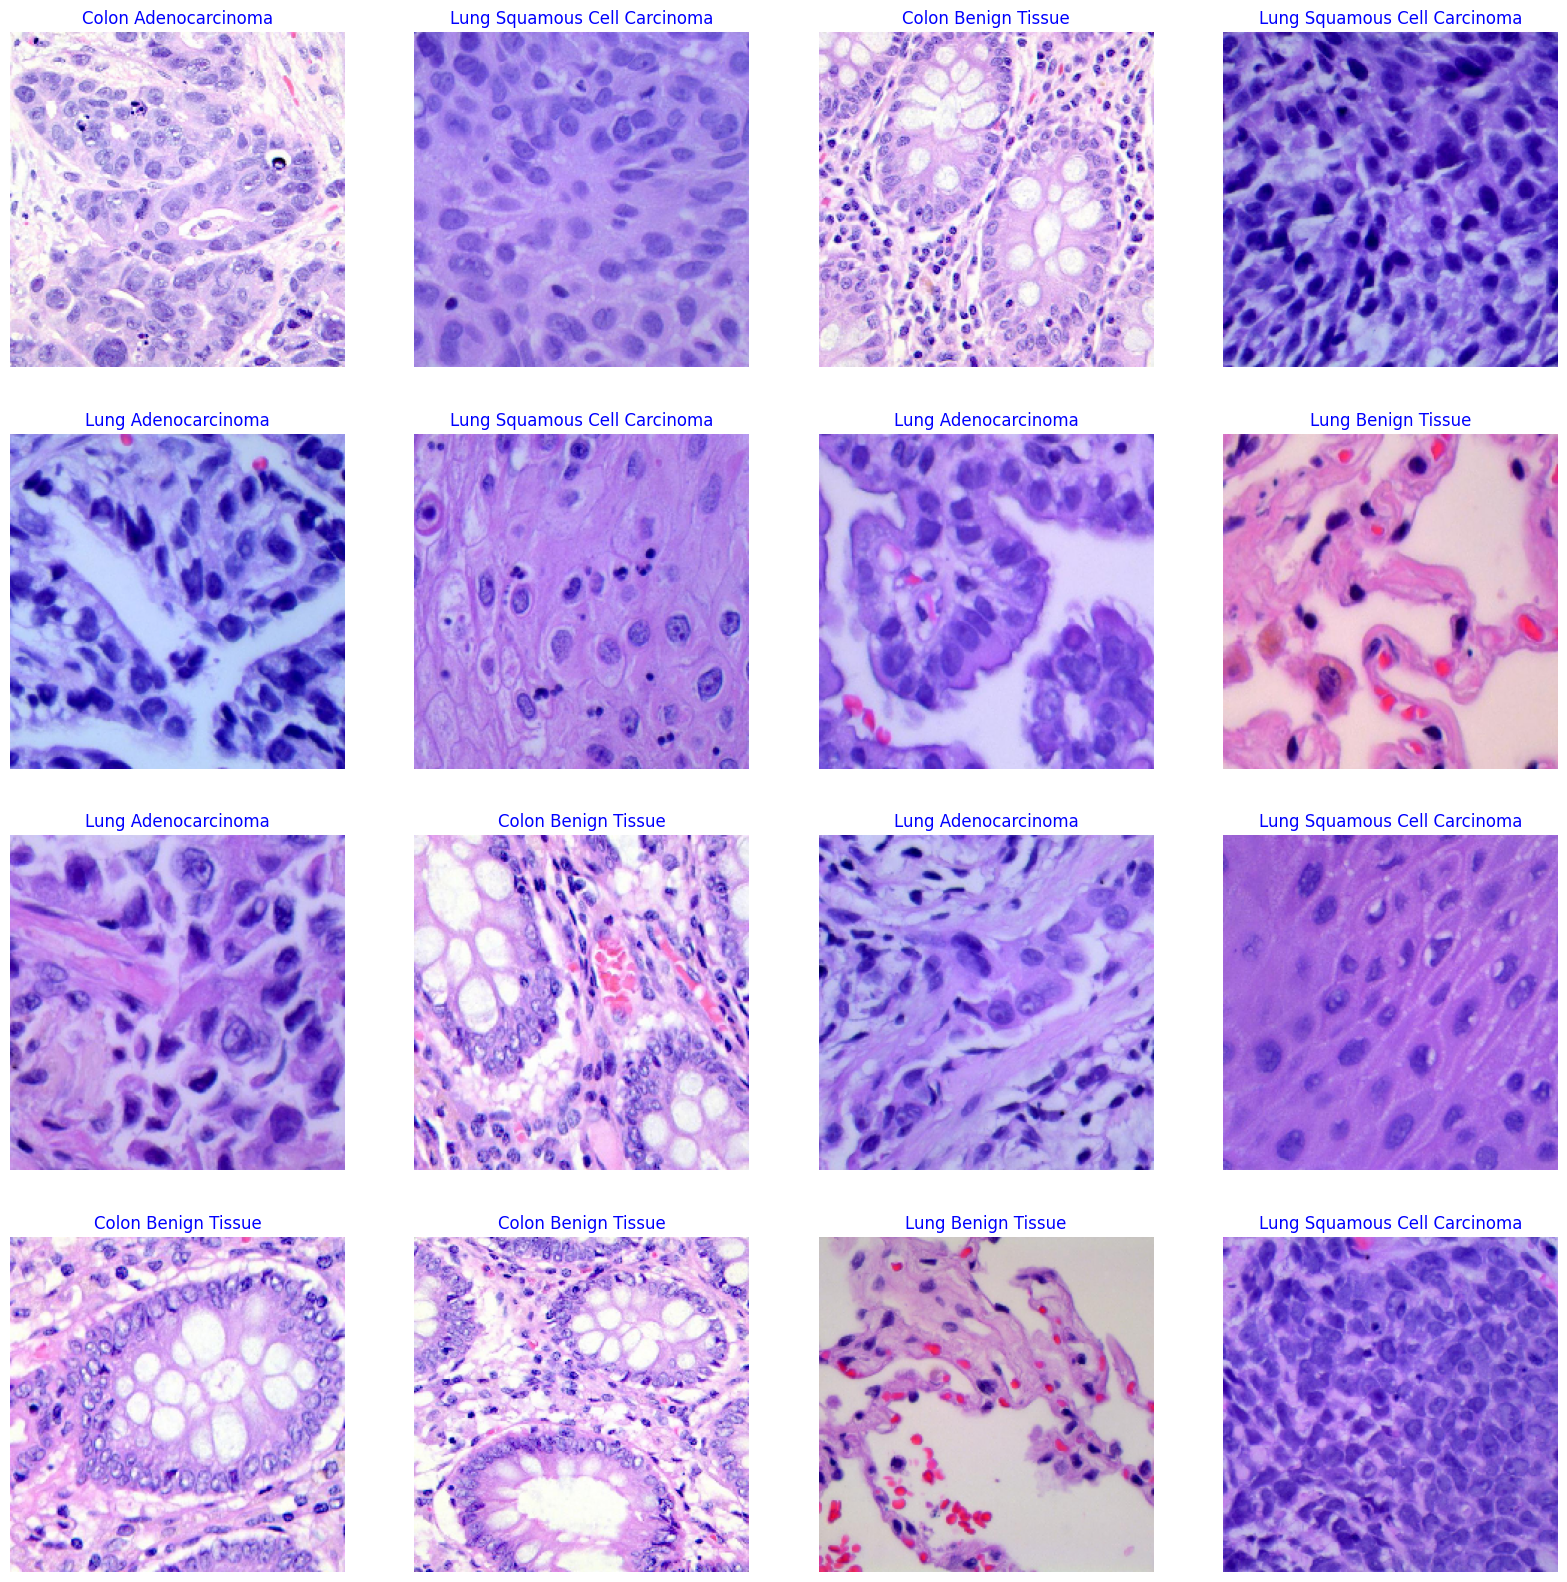

In [ ]:
g_dict = train_gen.class_indices      # defines dictionary {'class': index}
classes = list(g_dict.keys())       # defines list of dictionary's kays (classes), classes names : string
images, labels = next(train_gen)      # get a batch size samples from the generator

plt.figure(figsize= (20, 20))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255       # scales data to range (0 - 255)
    plt.imshow(image)
    index = np.argmax(labels[i])  # get image index
    class_name = classes[index]   # get class of image
    plt.title(class_name, color= 'blue', fontsize= 12)
    plt.axis('off')
plt.show()

# **Model Structure**

#### **Generic Model Creation**

In [ ]:
# Create Model Structure
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = len(list(train_gen.class_indices.keys()))

model = Sequential([
    Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu", input_shape= img_shape),
    Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),

    Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),

    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),

    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),

    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(256,activation = "relu"),
    Dense(64,activation = "relu"),
    Dense(class_count, activation = "softmax")
])

model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

#### **Train model**

In [ ]:
epochs = 20   # number of all epochs in training

history = model.fit(x= train_gen, epochs= epochs, verbose= 1, validation_data= test_gen,
                    validation_steps= None, shuffle= False)

Epoch 1/20
 71/313 ━━━━━━━━━━━━━━━━━━━━ 6:20:03 94s/step - accuracy: 0.2515 - loss: 20.5841

#### **Display model performance**

In [ ]:
# Define needed variables
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = model.evaluate(train_gen, steps= test_steps, verbose= 1)
valid_score = model.evaluate(valid_gen, steps= test_steps, verbose= 1)
test_score = model.evaluate(test_gen, steps= test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Valid Loss: ", valid_score[0])
print("Valid Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

# **Get Predictions**

In [ ]:
preds = model.predict(test_gen)
y_pred = np.argmax(preds, axis=1)

#### **Confusion Matrics and Classification Report**

In [ ]:
g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

In [ ]:
# Classification report
print(classification_report(test_gen.classes, y_pred, target_names= classes))

#### **Save model**

In [ ]:
#Save the model
model.save('Model.h5')

## **Prediction using loaded_model**

In [ ]:
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/ADY201m/Model.h5', compile=False)
loaded_model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [ ]:
image_path = '/content/drive/MyDrive/ADY201m/lung_colon_image_set/colon_image_sets/colon_aca/colonca1.jpeg'
image = Image.open(image_path)

# Preprocess the image
img = image.resize((224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

# Make predictions
predictions = loaded_model.predict(img_array)
class_labels = classes
score = tf.nn.softmax(predictions[0])
print(f"{class_labels[tf.argmax(score)]}")

In [ ]:
print("Train set size:", len(train_df))
print("Validation set size:", len(valid_df))
print("Test set size:", len(test_df))
